<a href="https://colab.research.google.com/github/lisbettildjuir/202055202106-Lisbet/blob/master/DL_Klasifikasi_Jenis_Buah_Nenas_M6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lisbettildjuir","key":"4bd8efe1bd232a499918636d0d0c52ac"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 May 10 13:54 kaggle.json


In [7]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d lisbettildjuir/deep-learning-klasifikasi-jenis-buah-nenas

  0% 0.00/2.57M [00:00<?, ?B/s]
100% 2.57M/2.57M [00:00<00:00, 33.6MB/s]


In [9]:
!unzip deep-learning-klasifikasi-jenis-buah-nenas.zip

Archive:  deep-learning-klasifikasi-jenis-buah-nenas.zip
  inflating: Nenas/Nenas Busuk/Gambar. 1.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 10.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 11.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 12.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 13.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 14.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 15.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 16.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 17.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 18.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 19.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 2.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 20.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 21.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 22.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 23.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 24.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 25.jpg  
  inflating: Nenas/Nenas Busuk/Gambar. 26.jpg  
  inflating: Nenas/Nenas Busuk/Ga

In [10]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [11]:
dataset_path = Path(r'/content/Nenas')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [12]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/Nenas/Nenas Muda/Gambar. 1.jpg,Nenas Muda
1,/content/Nenas/Nenas Muda/Gambar. 6.jpg,Nenas Muda
2,/content/Nenas/Nenas Muda/Gambar. 8.jpg,Nenas Muda
3,/content/Nenas/Nenas Muda/Gambar. 24.jpg,Nenas Muda
4,/content/Nenas/Nenas Muda/Gambar. 73.jpg,Nenas Muda


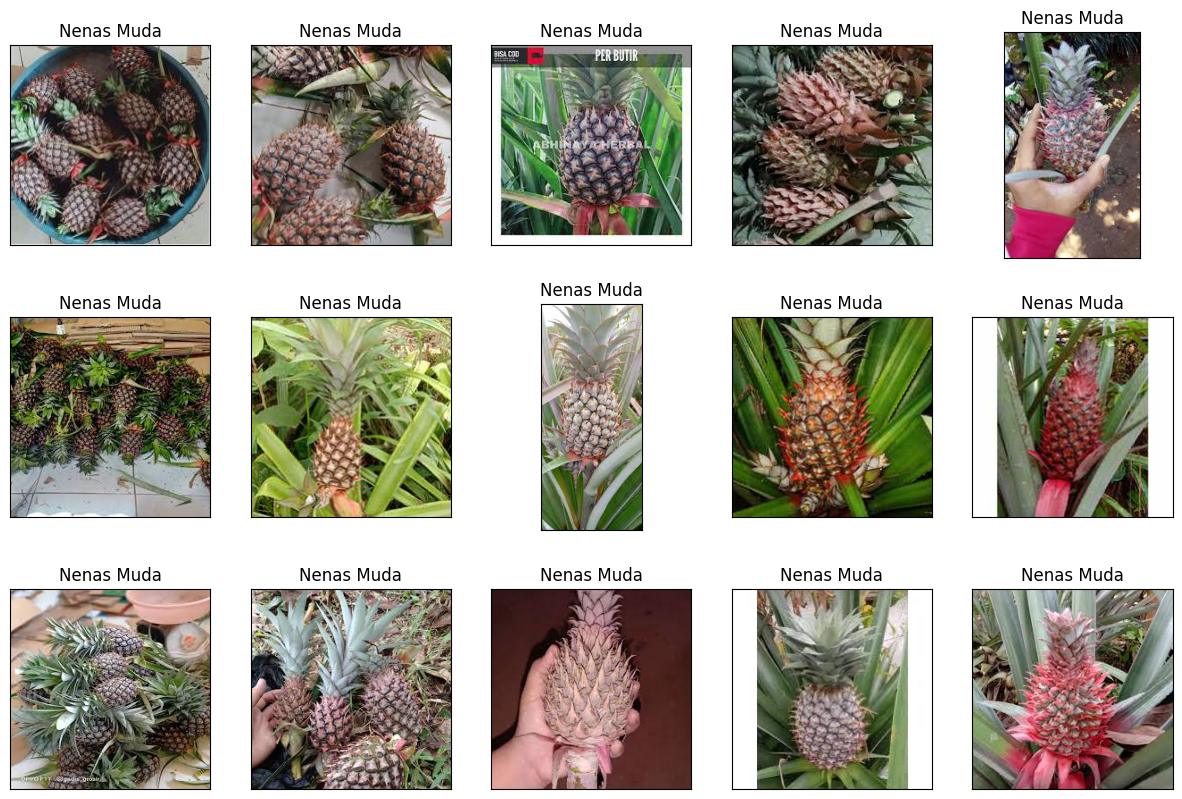

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [14]:
df.label.value_counts()

Nenas Masak    100
Nenas Muda      99
Nenas Busuk     30
Name: label, dtype: int64

In [15]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Nenas Masak    100
Nenas Muda      99
Nenas Busuk     30
Name: label, dtype: int64

In [16]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [17]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (128, 2)
Shape of test data (69, 2)
Shape of validation data (32, 2)


In [18]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 128 validated image filenames belonging to 3 classes.
Found 69 validated image filenames belonging to 3 classes.
Found 32 validated image filenames belonging to 3 classes.


In [19]:
input_shape = (200, 200, 3)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [39]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 150, validation_data=val, epochs=5, callbacks=callback)

Epoch 1/5
4/4 [==============================] - 39s 10s/step - loss: 0.9138 - accuracy: 0.6875 - val_loss: 0.7965 - val_accuracy: 0.6875
Epoch 2/5
4/4 [==============================] - 21s 5s/step - loss: 0.7793 - accuracy: 0.6328 - val_loss: 0.7380 - val_accuracy: 0.8125
Epoch 3/5
4/4 [==============================] - 21s 5s/step - loss: 0.6708 - accuracy: 0.8047 - val_loss: 0.7530 - val_accuracy: 0.7188
Epoch 4/5
4/4 [==============================] - 21s 6s/step - loss: 0.6151 - accuracy: 0.7578 - val_loss: 0.6671 - val_accuracy: 0.7812
Epoch 5/5
4/4 [==============================] - 22s 5s/step - loss: 0.5501 - accuracy: 0.8438 - val_loss: 0.5720 - val_accuracy: 0.8125


In [40]:
model.save('model-1.h5')

In [41]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

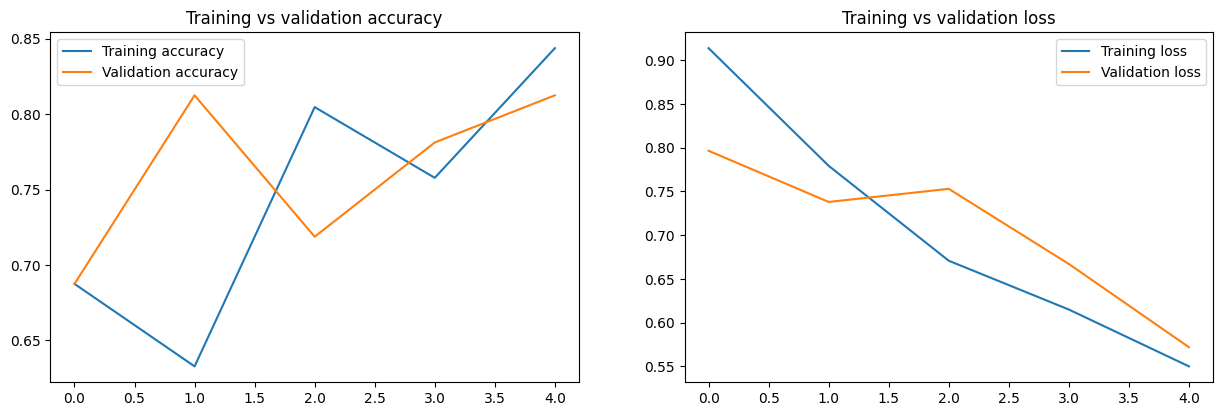

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [43]:
pred = model.predict(test)

3/3 [==============================] - 5s 1s/step


In [44]:
pred = np.argmax(pred, axis=1)

In [45]:
labels = train.class_indices

In [46]:
labels

{'Nenas Busuk': 0, 'Nenas Masak': 1, 'Nenas Muda': 2}

In [47]:
labels = dict((v,k) for k, v in labels.items())

In [48]:
labels

{0: 'Nenas Busuk', 1: 'Nenas Masak', 2: 'Nenas Muda'}

In [49]:
y_pred = [labels[k] for k in pred]

In [50]:
print(classification_report(x_test.label, y_pred))

              precision    recall  f1-score   support

 Nenas Busuk       0.00      0.00      0.00        13
 Nenas Masak       0.69      0.86      0.76        28
  Nenas Muda       0.71      0.86      0.77        28

    accuracy                           0.70        69
   macro avg       0.46      0.57      0.51        69
weighted avg       0.56      0.70      0.62        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print(confusion_matrix(x_test.label, y_pred))

[[ 0  7  6]
 [ 0 24  4]
 [ 0  4 24]]


In [52]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 6s 1s/step - loss: 0.8495 - accuracy: 0.7101
